<center> <h1>Assignment 3 </h3> </center>

<div id="1">
    <h2>Importation:</h2>
</div>


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.offline as py
import plotly
import plotly.subplots
import plotly.graph_objects as go
import plotly.express as px
import random
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score, max_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier)

In [2]:
#conda install -c plotly plotly 

In [3]:
#conda install -c conda-forge plotnine

In [4]:
#conda install -c conda-forge xgboost

In [5]:
#conda install -c conda-forge scikit-learn 

In [6]:
SEED = 0
RSEED = 42

### Importing the data:

In [7]:
train = pd.read_csv('/Users/omers/Downloads/train.csv')
test = pd.read_csv('/Users/omers/Downloads/test.csv')
train_df=train.copy()
test_df=test.copy()

In [8]:
train.head(2)

Unnamed: 0     id Gender      Customer Type  Age   Type of Travel  \
0           0  70172   Male     Loyal Customer   13  Personal Travel   
1           1   5047   Male  disloyal Customer   25  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  

[2 rows x 25 columns]

In [9]:
test.head(2)

Unnamed: 0     id  Gender   Customer Type  Age   Type of Travel     Class  \
0           0  19556  Female  Loyal Customer   52  Business travel       Eco   
1           1  90035  Female  Loyal Customer   36  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   

   ...  Inflight entertainment  On-board service  Leg room service  \
0  ...                       5                 5                 5   
1  ...                       4                 4                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 5                2                 5            5   
1                 4                3                 4            5   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  
0                          50                      44.0     satisfied  
1                           0                       0.0     satisfied  

[2 rows x 25 columns]


<div id="2">
    <h2>2. Data description:</h2>
</div>



## About the data:

This dataset contains an airline passenger satisfaction survey.
Content

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)



In [10]:
# Check if the information we have is full or missing values
l = []
for col in train.columns[2:]:
    l.append([col, train[col].isnull().sum()])
number_of_nulls = pd.DataFrame(l, columns = ["Column", "Number of NaN values"])
del l
number_of_nulls

Column  Number of NaN values
0                              Gender                     0
1                       Customer Type                     0
2                                 Age                     0
3                      Type of Travel                     0
4                               Class                     0
5                     Flight Distance                     0
6               Inflight wifi service                     0
7   Departure/Arrival time convenient                     0
8              Ease of Online booking                     0
9                       Gate location                     0
10                     Food and drink                     0
11                    Online boarding                     0
12                       Seat comfort                     0
13             Inflight entertainment                     0
14                   On-board service                     0
15                   Leg room service                     0
16                   Baggage handling                     0
17                    Checkin service                     0
18                   Inflight service                     0
19                        Cleanliness                     0
20         Departure Delay in Minutes                     0
21           Arrival Delay in Minutes                   310
22                       satisfaction                     0

In [11]:
# Clearly see which feature is numeric and ech feature is categorical:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

###  Graph depicting the ratio between loyal customers and non-loyal customers:

Text(0.5, 1.0, 'Ratio between loyal customers and non-loyal customers')

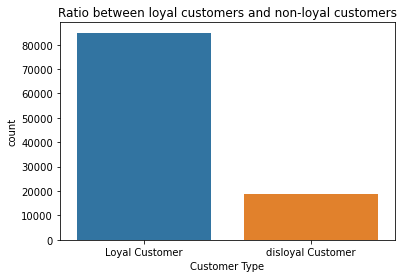

In [12]:

sns.countplot(x='Customer Type',data=train_df).set_title("Ratio between loyal customers and non-loyal customers")

We can see from the graph above that majority of the customers are labeled as loyal customer. Now we will explore how they are divided within the data.

In [13]:
fig = px.sunburst(train_df, path=['Type of Travel','Class', 'Customer Type'],title="Division of features according to their proportions")
fig.show()

From the sunburst graph we can see that all customers are divided to buisness and personal travel. Each of the groups divided in 3 sub groups of 3 classes: Buiseness, Eco, Eco plus. We can see interesting fact that in Eco class of Business travel, loyal and disloyal customers shares the quantity by 50/50, while in Personal Travel in same Eco class there is almost all passengers are loyal. From this case we can conclude that person in business travel, flying Eco class, has 50% chance to be disloyal customer. On the other hand person flying Eco class with personal travel reason, is 99% loyal customer.

<AxesSubplot:title={'center':'Customer Satisfaction by Type of Travel'}, xlabel='satisfaction', ylabel='count'>

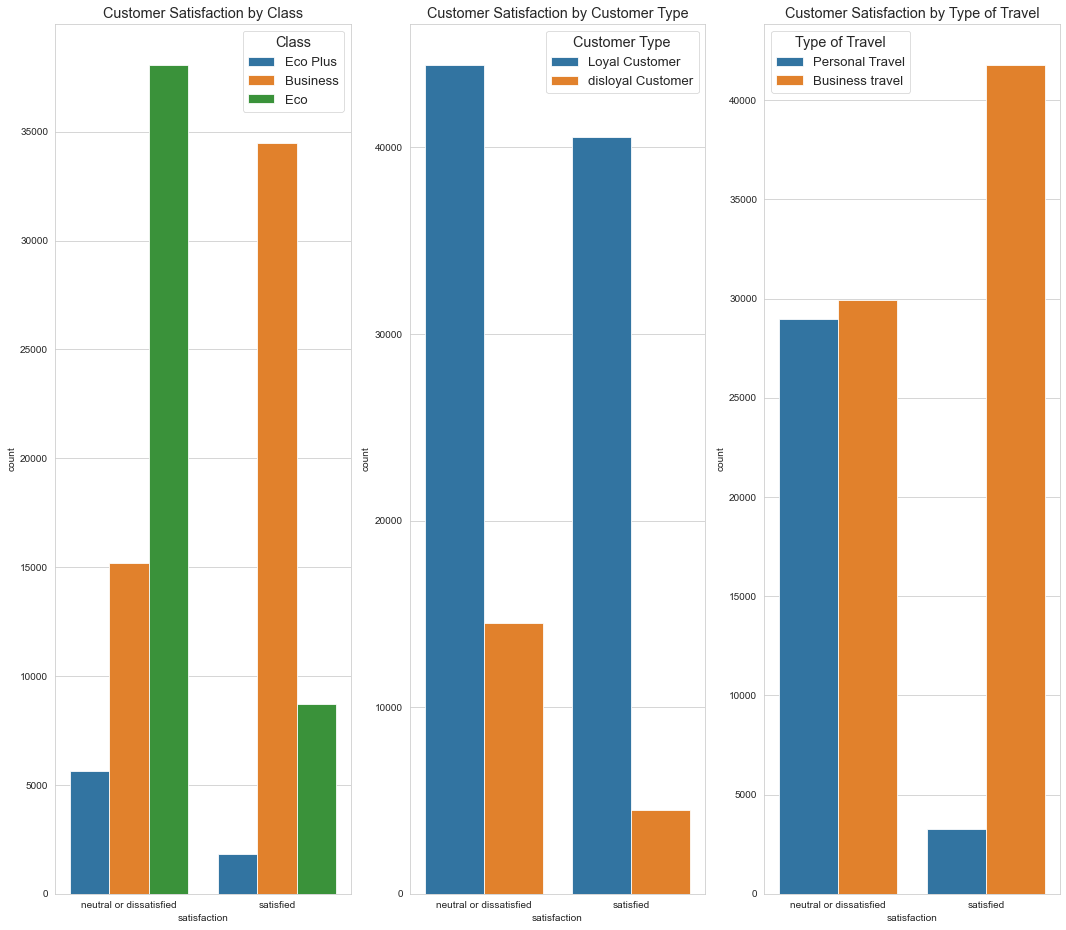

In [14]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize=(18,16))
sns.set_context('paper', font_scale=1.5)

ax[0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = train_df, hue = 'Class', ax=ax[0])

ax[1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = train_df, hue = 'Customer Type', ax=ax[1])

ax[2].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = train_df, hue = 'Type of Travel', ax=ax[2])

From the 1st graph above we can clearly see that majority of neutral or dissatisfied customers are in Eco class. Because of this reason flying company should give emphasis on that class in order to figure out the reasons and to reduce them. Most satisfied customers are in business class which is not surprising since conditions in this kind of class are much higher then others.

In the 2nd graph we can see that majority of dissastified and satisfied customers are the loyal customers, which is not surprise, because we saw in previous charts that there are more of them then others.


In the 3rd graph we can see that there are almost same quantity of personal and business reason customers which are dissatisfied. On the other side, majority of satisfied customers are those customers who fly because of business travel, which is also not surprising.

### Online Booking:
combined with lower corrolated feature: Departure/Arrival Time Convenient , devided by classes.

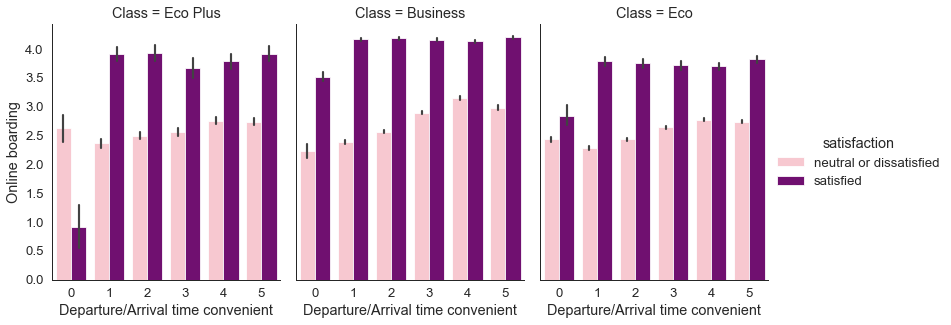

In [15]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding",
                    hue="satisfaction", col="Class",palette=['pink', 'purple'], data=train_df, kind="bar", height=4.5, aspect=.8)

<h4> Online Boarding, Departure/Arrival Time Convenience grouped by Class:</h4> 

Eco Plus class: Has relativly high rates of dissatisfaction, regardless the Online boarding time. 
 We can see the effect of the Departure/Arrival Time Convenience mainly when it was rated 0, where the satisfaction rates are low. 
 
Business class: Has high rates of satisfaction regardless the Departure/Arrival Time Convenience. Also there are high rates of Online boarding satisfaction. 

Eco class: Like buisness class, the number of satisfied passengers is highercompared to number of dissatisfied passengers.

*Also as expected from the corrolation matrix, we can see that low score of Online boarding has low satisfaction scores. 

### Type of Travel:
combined with lower corrolated feature: Departure/Arrival Time Convenient , devided by classes.

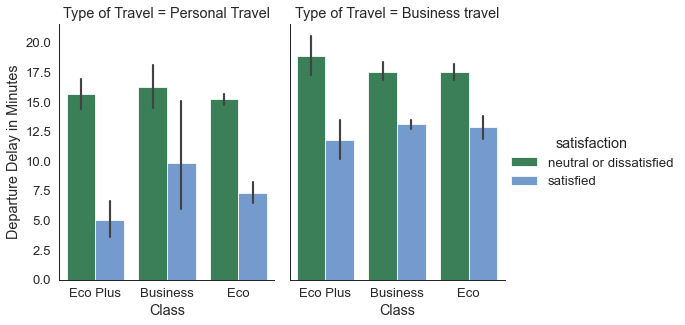

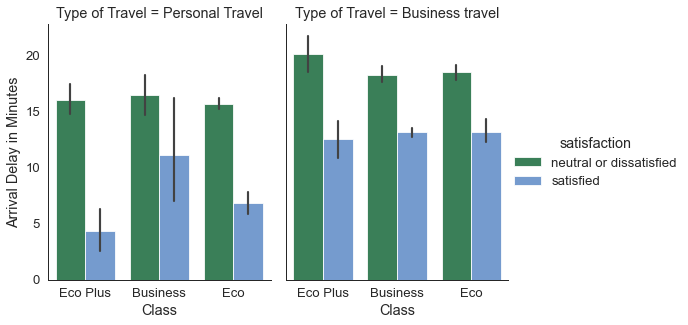

In [16]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes",palette=['seagreen', '#69d'], hue="satisfaction", col="Type of Travel", data=train_df, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction",palette=['seagreen', '#69d'], col="Type of Travel", data=train_df, kind="bar", height=4.5, aspect=.8)

<h4> Departure Delay, Arrival Delay grouped by Type of Travel and class:</h4>
Personal travel : dissatisfaction is really affected when arrival and departure delay is high.

As expected from the corrolation matrix, the corrolation between Departure Delay, Arrival Delay and sattisfaction is negative - we can see in this bar graph the reason: bigger number of minutes delay is connected to hiher dissetisfaction and vise- versa.

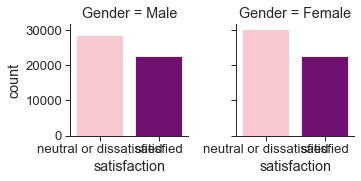

In [17]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train_df,palette=['pink','purple'] , kind="count", height=2.5, aspect=1.0)  


<h4>Gender: </h4> As we accpected from the corrolation matrix, there is no difference between females and males satisfaction-wise.

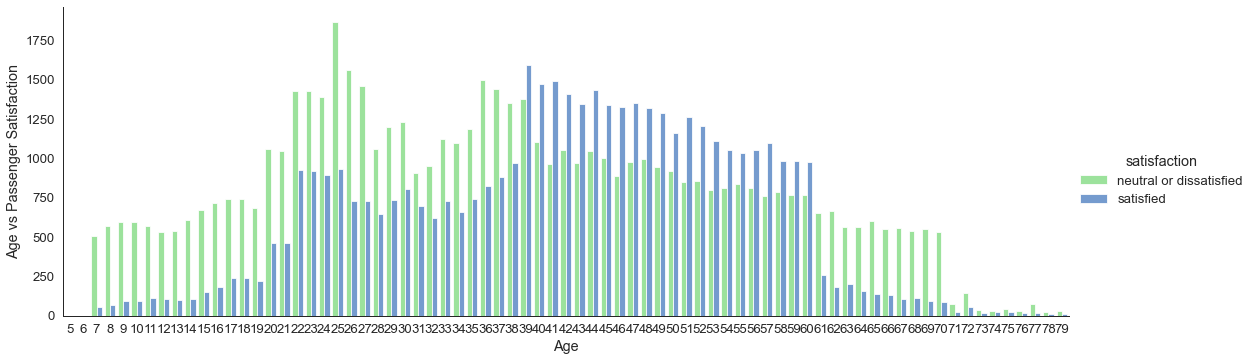

In [18]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train_df, palette=['lightgreen', '#69d'], aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

<h4>Age: </h4> From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

<div id="3">
    <h2>3. Data preperation:</h2>
</div>


#### Filling missing values in "Arrival Delay in Minutes":
1.Let's see the disterbution:

Text(0.5, 1.0, 'Density of Arraival Delay in Minutes')

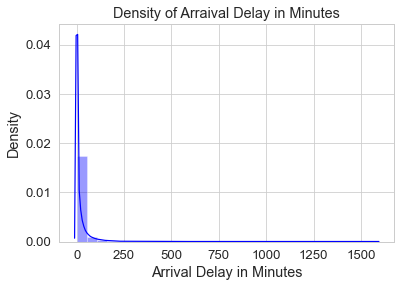

In [19]:

sns.distplot(train['Arrival Delay in Minutes'].dropna(),kde=True,color='blue',bins=30).set_title("Density of Arraival Delay in Minutes")

2. It can be seen that all values move around a certain average. Therefore in order to fill in the missing data, we will use the average:

In [20]:
# Imputing missing value with mean:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())


In [21]:
# Imputing missing value with mean:
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].mean())
test_df['Arrival Delay in Minutes'] = test_df['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].mean())

In [22]:
# Turn data to numeric- Works best for our later on algorithms:

def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

train = process_data(train)
test = process_data(test)

In [23]:
#Define our features and target (this is helpful in case you would like to drop any features that harm model performance)
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

## Data Exploration:

## Connection between satisfaction and different types of services:
Checkin Service, Inflight Service, On-board Service, Leg-room Service:

<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction'>

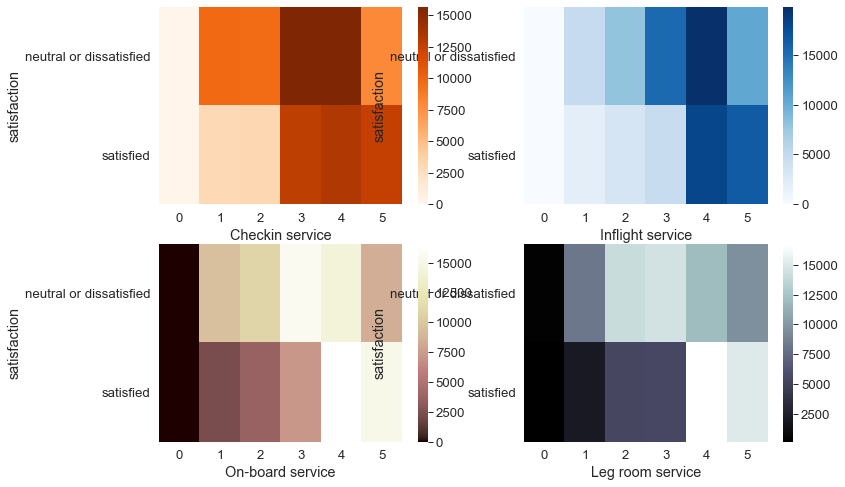

In [24]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train_df['satisfaction'], train_df['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train_df['satisfaction'], train_df['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train_df['satisfaction'], train_df['On-board service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train_df['satisfaction'], train_df['Leg room service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

In each graph satisfied customers scores are distributed as expected: ratings 4 and 5 are the majority of all scores. On the other hand, majority of dissatisfied customers scores are rated also high (3 and 4), hence it is showed that they are not a good indicators for satisfaction.

Inflight service - same as in previous graph, satisfied customers scores distributed as expected, and dissatisfied customers scores are not.

##### We created corrolation matrix to see which features are most corrolated :

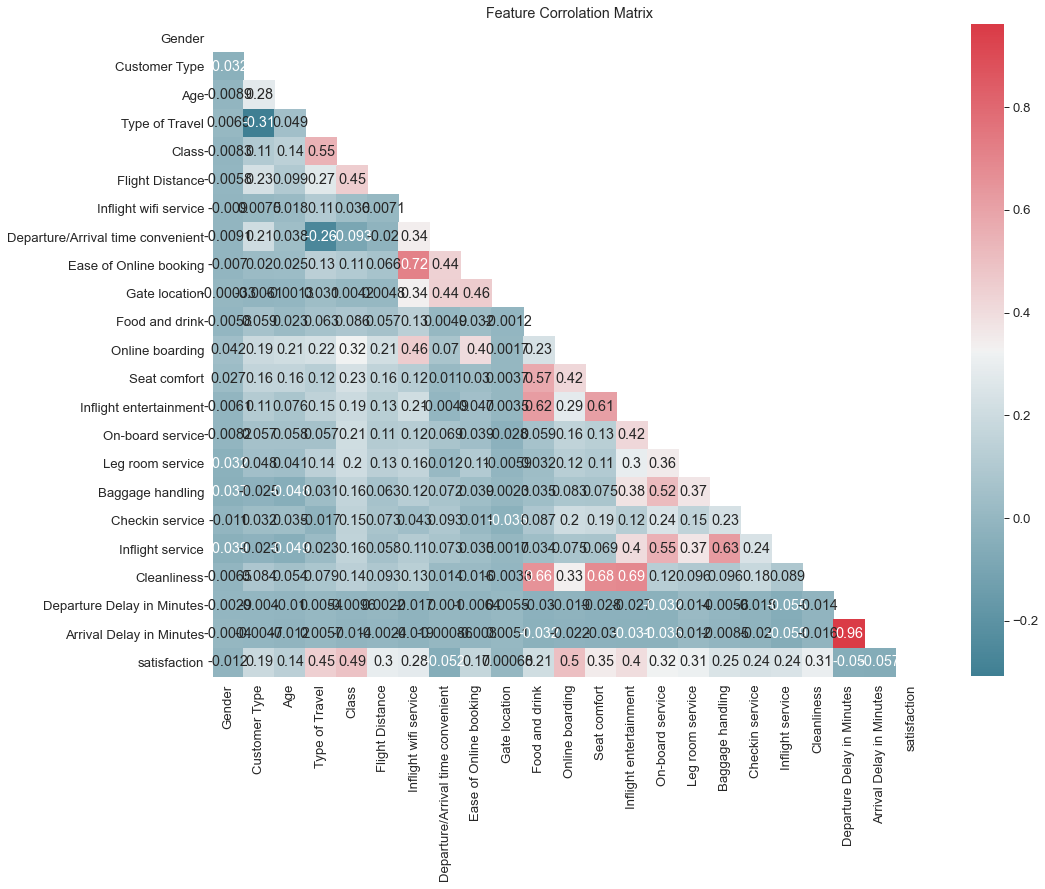

In [25]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax).set_title("Feature Corrolation Matrix")
plt.show()

### Conclusions from corrolation matrix:

We can see Cleanliness is higly corroleted with the features descrbing "while on flight" charateristics (Food & Drink" , ,Seat Comfort" , ' Infligth enterteinment" . 
But, not high enough therfore we will not remove non of them .

We can see a 96% corrolation between Arrival delay in Minutes & Departure Delay in minutes.
That is quite obvuois why.

We will combine the 2 into 1 feature : "Delay in minutes".
The prons of this action:
less running time, without sagnificant impact on accuracy. 



<h3> PCA 3D & 2D : </h3>

In [26]:
scaled_data = preprocessing.scale(train)
xy = sklearnPCA(n_components=2).fit_transform(scaled_data)
ran=random.sample(list(xy), 1000)
xyz = sklearnPCA(n_components=3).fit_transform(scaled_data)
ran_1=random.sample(list(xyz), 1000)

In [27]:
threeD = pd.DataFrame(ran_1)
pca_df = pd.DataFrame(ran)
# Plot the data on a graph to see the nodes before and after clustering. 
fig =  plotly.subplots.make_subplots(rows=1, cols=2, horizontal_spacing=0.03, specs=[[{"type": "xy"},{"type": "scatter3d"}]])
fig.add_trace(
    go.Scatter( x=pca_df[0], y=pca_df[1],marker_symbol='hexagon2', mode="markers+text", 
               marker=dict(size=12,color='rgba(135, 206, 250, 0.7)', line=dict(width=1, color='DarkSlateGrey'))),
    row=1, col=1)
fig.add_trace(
    go.Scatter3d(x=threeD[0], y=threeD[1], z=threeD[2], 
                 mode="markers",marker_symbol='circle-open', marker=dict(size=7)),
    row=1, col=2)
fig.update_xaxes(title_text="x", row=1, col=1)
fig.update_yaxes(title_text="y", row=1, col=1)
fig.update_layout(height=600, width=1000,
                  title_text="Plotting data after lowering the it's dimention, once in 2D the other 3D", showlegend=False)
fig.show()

From first look at the data we can't really inffer anything yet, we will run clustering model to get better insigths from the data


<div id="4">
    <h2>4. Features effecting costumer's satisfaction:</h2>
</div>



### Unsupervised algorithms:
We will use clustering algorithm in order to create features that may help use classidy costumer's satisfaction in our future work.
Our goal is to reduce the number of features in the porpuse of lowering the running time without effecting the accuracy. 

In [28]:
drop_cols = ["Unnamed: 0" , "id"]
num_cols = ["Age" , "Flight Distance" ,"Departure Delay in Minutes" , "Arrival Delay in Minutes"]
y_col = "satisfaction"
cat_cols = list(set(train.columns).difference(set(drop_cols+num_cols)))

In [29]:
ohe = OneHotEncoder(drop="first")
cat_df = pd.DataFrame(ohe.fit_transform(train[cat_cols]).todense() , columns=ohe.get_feature_names(cat_cols))

In [30]:
y = train['satisfaction']
X = train.drop(columns=["satisfaction"])
X__train , X__test , y__train  ,y__test = train_test_split(X,y)

In [31]:
mms = MinMaxScaler()
num_df = pd.DataFrame(mms.fit_transform(train[num_cols]) , columns=num_cols)

In [32]:
X = cat_df.join(num_df)
y = train[y_col]

In [33]:
X__train , X__test , y__train  ,y__test = train_test_split(X,y)

In [34]:
k_means = KMeans(2)
k_means.fit(X__train)

KMeans(n_clusters=2)

In [35]:
tsne = TSNE(2 , n_iter=250)
transformed_df = tsne.fit_transform(X__train)

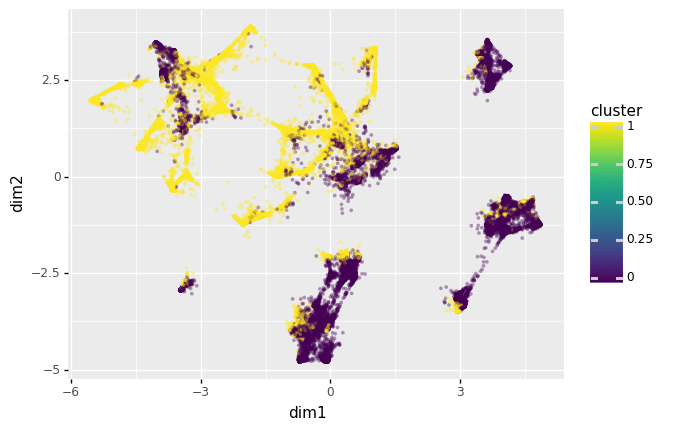

<ggplot: (127342350364)>

In [36]:
(
    ggplot(pd.DataFrame({"dim1" : transformed_df[: , 0]
                        ,"dim2" : transformed_df[: , 1]
                        ,"cluster" : k_means.labels_}) , aes(x="dim1" , y="dim2" , fill="cluster"))
    + geom_point(alpha=0.4 , stroke=0)
)

We can see that the labels mostly don't overlap and therefore we have a good separation of the data points using the KMeans labels.

We will check it with ground truth labels in satisfaction.

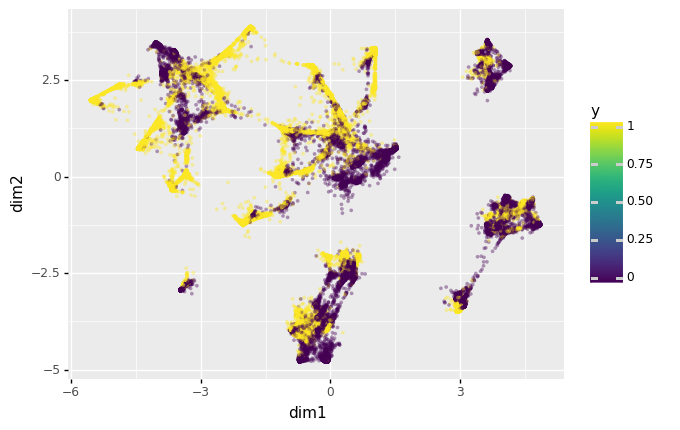

<ggplot: (127339394859)>

In [37]:
(
    ggplot(pd.DataFrame({"dim1" : transformed_df[: , 0]
                        ,"dim2" : transformed_df[: , 1]
                        ,"y" : y__train}) , aes(x="dim1" , y="dim2" , fill="y"))
    + geom_point(alpha=0.4 , stroke=0)
)

From the t-sne plot above we can see that there are 6 groups. The majority of satisfied customers are in 2 big clusters (yellow). Now we will run kmeans to understand what special about this 2 groups and try to understand which features influenced on them.

In [38]:
kmeans = KMeans(6)
kmeans.fit(X__train)

KMeans(n_clusters=6)

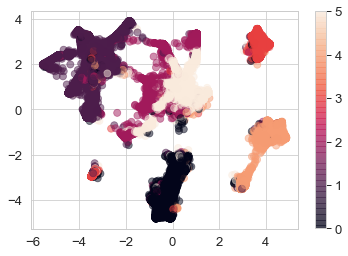

In [39]:
centroids = kmeans.cluster_centers_
labels= kmeans.labels_

my_plot = plt.scatter(transformed_df[: , 0],transformed_df[: , 1],c= kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.colorbar(my_plot) 

We got 6 clusters after kmeans execution. As we remember the interesting us clusters are clusters number 1 (dark purple) and number 2(dark pink). We will run get_melted_clusters function to understand what is most important for this two clusters.

In [40]:
def get_melted_clusters(labels):
    result_df = X__train.copy()
    result_df[num_cols] = mms.inverse_transform(X__train[num_cols])
    result_df["cluster"] = labels
    melt_cluster = result_df.groupby("cluster").mean().reset_index().melt(id_vars="cluster")
    melt_cluster = melt_cluster["variable"].str.split("_" , expand=True).join(melt_cluster)
    melt_cluster = melt_cluster.rename({0 : "variable_base" , 1:"response"} , axis=1)
    melt_cluster["cluster"] = melt_cluster["cluster"].astype("category") 
    return melt_cluster

In [41]:
mc2 = get_melted_clusters(kmeans.labels_)

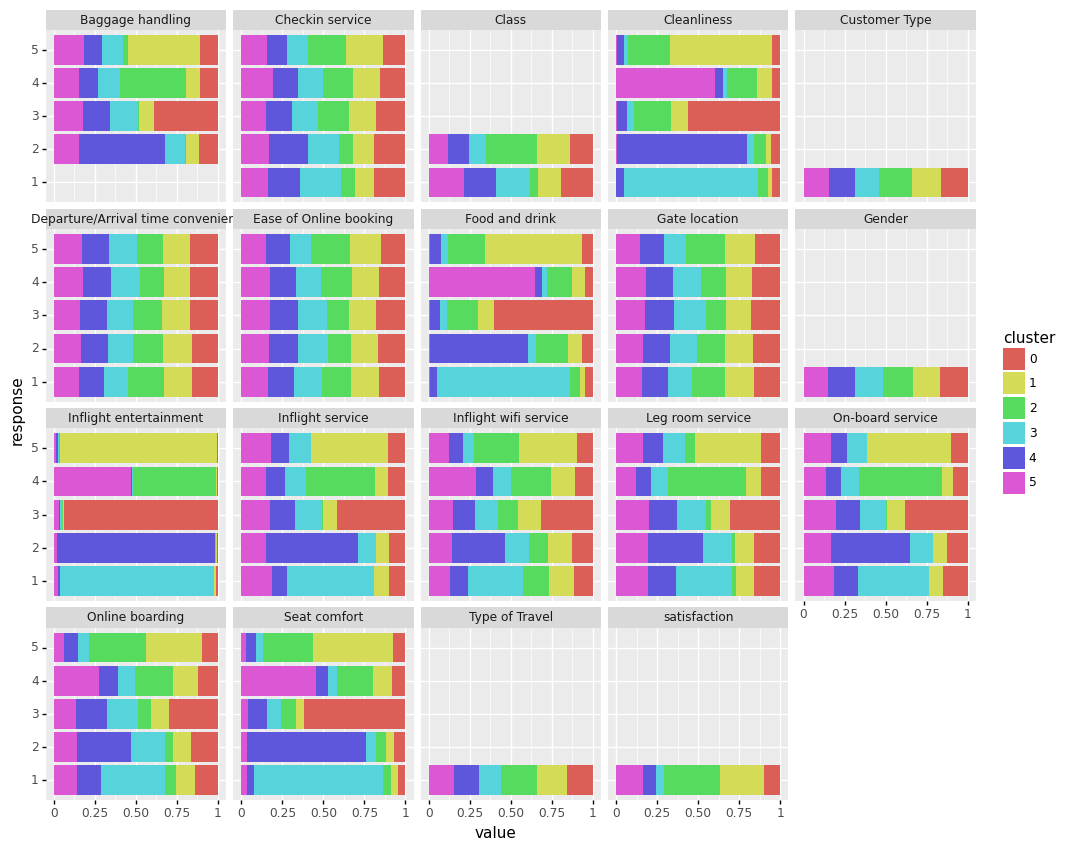

<ggplot: (127342302145)>

In [42]:
(
    ggplot(mc2[~mc2["response"].isna()],aes(x="response" , y="value" ,fill="cluster"))
    + geom_col(position="fill")
    + coord_flip()
    + facet_wrap("~ variable_base")
    + theme(figure_size=(12,10))
)

In the plots above we can see all clusters features importance. We will focus on clusters 1 and 2 (yellow and green). We analyse each feature and conclude that:

Features that yellow class rated as 4 and 5: Baggage handling, cleanliness, food and drink, inflight entertainment, inflight service, leg room service and seat comfort

Features that green class rated as 4 and 5: Baggage handling, inflight entertainment, inflight service, leg room service and seat comfort.

### Feature resembeling:

We noticed from the corrolation matrix a strong corrolation between 'Departure Delay in Minutes' and 'Arrival Delay in Minutes', as expected.
We therfore will merge it into 1 feature called :"Delay in minutes" in order to generelaize our training, avoid overfitting and make the algorithms ahed run faster. 

From our results of the KMean clustering we saw that :
- 'Departure/Arrival time convenient'
- 'Ease of Online booking'
- 'Gate location'
- 'Checkin service'

are evenlly distrebuted among all clusters.
Therfore we can conclde those features has low prediction rate, and for the same reasons mantioned above, we will merge those into 1 feature called : "Services off flight"


In [43]:
# we will use mean of both features under the assumptoin that a specific flight Departure Delay is effecting 
#That specific flight Departure Delay:
train_improved=train.copy()
train_improved["Delay in minutes"] = train[['Arrival Delay in Minutes','Departure Delay in Minutes']].mean(axis=1)
train_improved= train_improved.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'], axis=1)

test_improved=test.copy()
test_improved["Delay in minutes"] = test[['Arrival Delay in Minutes','Departure Delay in Minutes']].mean(axis=1)
test_improved= test_improved.drop(['Arrival Delay in Minutes','Departure Delay in Minutes'], axis=1)

In [44]:
# we will use mean of all features as for all of them are scores on scale of 1 to 5:

train_improved["Services off flight"] = train[['Departure/Arrival time convenient',
                                              'Ease of Online booking','Gate location','Checkin service' ]].mean(axis=1)
train_improved= train_improved.drop(['Departure/Arrival time convenient',
                                              'Ease of Online booking','Gate location','Checkin service'], axis=1)


test_improved["Services off flight"] = test[['Departure/Arrival time convenient',
                                              'Ease of Online booking','Gate location','Checkin service' ]].mean(axis=1)
test_improved= test_improved.drop(['Departure/Arrival time convenient',
                                              'Ease of Online booking','Gate location','Checkin service'], axis=1)

In [45]:
train_improved.head(2)

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       0              1   13               0      1              460   
1       0              0   25               1      2              235   

   Inflight wifi service  Food and drink  Online boarding  Seat comfort  \
0                      3               5                3             5   
1                      3               1                3             1   

   Inflight entertainment  On-board service  Leg room service  \
0                       5                 4                 3   
1                       1                 1                 5   

   Baggage handling  Inflight service  Cleanliness  satisfaction  \
0                 4                 5            5             0   
1                 3                 4            1             0   

   Delay in minutes  Services off flight  
0              21.5                 3.00  
1               3.5                 2.25

We can see that there is a lot of similatiry between 2 graphs colors.

<div id="5">
    <h2>5. Maximize preformance for classifaying and identifing cosumer's satisfaction:</h2>
</div>



### How are we going to maximize preformance?

Out-of-Fold Predictions for Ensembles:

common use for out-of-fold predictions is to use them in the development of an ensemble model.
An ensemble is a machine learning model that combines the predictions from two or more models prepared on the same training dataset.

As Base models: Models evaluated using k-fold cross-validation on the training dataset and all out-of-fold predictions are retained.

1. RandomForest
2.SVM
3.Adaboost

As Meta-Model: Model that takes the out-of-fold predictions made by one or more models as input and shows how to best combine and correct the predictions.

Gradient Boost 

** Out-of-Fold Predictions : Predictions made by the model during the k-fold cross-validation procedure on the holdout examples.



### Why does it maximize the preformance?

We are avoiding the possibility for "optimistic bias" because the samples were used in the training of each base model. This optimistic bias means that the predictions will be better than normal, and the meta-model will likely not learn what is required to combine and correct the predictions from the base models.

By using out-of-fold predictions from the base model to train the meta-model, the meta-model can see and harness the expected behavior of each base model when operating on unseen data, as will be the case when the ensemble is used in practice to make predictions on new data.

Finally, each of the base models are trained on the entire training dataset and these final models and the meta-model can be used to make predictions on new data. The performance of this ensemble can be evaluated on a separate holdout test dataset not used during training.


In [46]:
new_feature_no_target=['Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Inflight service',
 'Cleanliness',
 'Delay in minutes',
 'Services off flight']

In [47]:
#Normalizing data:
train_no_target=train_improved.drop("satisfaction", axis=1)
test_no_target=test_improved.drop("satisfaction", axis=1)
cols = list(train_no_target.columns)

# First center and scale the data
train_data=train_no_target[cols]

test_data = test_no_target[cols]

train_scaled_data = preprocessing.scale(train_data)
test_scaled_data =  preprocessing.scale(test_data)

train_df = pd.DataFrame(train_scaled_data , columns=new_feature_no_target)
test_df = pd.DataFrame(test_scaled_data, columns=new_feature_no_target)

In [48]:
y_train=train["satisfaction"]
y_test=test["satisfaction"]

### class SklearnHelper :
a class of helper methods in sklearn.
We will train and fit all of the algoritms, so in order to make a readble code and won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [49]:
# Some useful parameters which will come in handy later on
ntrain = train_no_target.shape[0]
ntest = test_no_target.shape[0]
NFOLDS = 5 # set folds for out-of-fold prediction
kfold = KFold(n_splits = 5)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
        
        return self.clf.fit(x,y).feature_importances_

In [50]:
# Out Of Fold function:
#Preforms the KFolds validation:

def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kfold.split(train)): 
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [51]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}


# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [52]:
# Create 4 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [53]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['satisfaction'].ravel()
x_train = train_no_target.values# Creates an array of the train data
x_test = test_no_target.values # Creats an array of the test data

In [54]:
# Create our OOF train and test predictions. These base results will be used as new features:
#Use k-fold cross-validation and collect out-of-fold predictions.

rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [55]:
# Save each model's feature importance
rf_features = rf.feature_importances(x_train,y_train)
ada_features = ada.feature_importances(x_train, y_train)
gb_features = gb.feature_importances(x_train,y_train)


[0.00109606 0.03400081 0.01025096 0.12713755 0.1563552  0.01449916
 0.1557561  0.00539751 0.25018486 0.04814014 0.07345462 0.02823338
 0.03988473 0.01512479 0.01283598 0.02001204 0.00131895 0.00631716]
[0.002 0.03  0.136 0.036 0.012 0.174 0.06  0.01  0.036 0.062 0.088 0.022
 0.034 0.036 0.04  0.058 0.078 0.086]
[8.42537368e-05 2.92503333e-02 8.91151955e-03 1.56927903e-01
 3.71729187e-02 4.83505070e-03 2.19532674e-01 8.73313755e-04
 4.10150222e-01 1.69940657e-02 3.61851342e-02 1.37296755e-02
 1.68387548e-02 1.16935003e-02 1.31562620e-02 1.34975420e-02
 3.46629238e-03 6.70058416e-03]


In [56]:
rf_features =[0.00109606, 0.03400081, 0.01025096, 0.12713755, 0.1563552 , 0.01449916,
              0.1557561,  0.00539751, 0.25018486, 0.04814014 ,0.07345462 ,0.02823338
              ,0.03988473, 0.01512479 ,0.01283598 ,0.02001204, 0.00131895, 0.00631716]
ada_features = [0.002, 0.03,  0.136, 0.036, 0.012, 0.174, 0.06 , 0.01 , 0.036 ,0.062,
                0.088, 0.022,0.034, 0.036, 0.04,  0.058, 0.078, 0.086]
gb_features =[8.42537368e-05, 2.92503333e-02, 8.91151955e-03, 1.56927903e-01,
              3.71729187e-02, 4.83505070e-03, 2.19532674e-01 ,8.73313755e-04,
              4.10150222e-01, 1.69940657e-02, 3.61851342e-02, 1.37296755e-02,
              1.68387548e-02, 1.16935003e-02, 1.31562620e-02, 1.34975420e-02,3.46629238e-03, 6.70058416e-03]

In [57]:
cols = new_feature_no_target.copy()
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features':cols,
     'Random Forest feature importances': rf_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

## Plots showing presentage of feature importance by each model trained:

In [58]:

# Scatter plot Random Forest:
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


# Scatter plot AdaBoost:
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot Gradient Boost :
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [59]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

features  Random Forest feature importances  \
0         Gender                           0.001096   
1  Customer Type                           0.034001   
2            Age                           0.010251   

   AdaBoost feature importances  Gradient Boost feature importances      mean  
0                         0.002                            0.000084  0.001060  
1                         0.030                            0.029250  0.031084  
2                         0.136                            0.008912  0.051721

In [60]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [61]:
# Create new training and testing data according to results of base model feature importance:
x_train = np.concatenate((  rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate((  rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

Now we will train the kgboost algoritm (our meta-model) using the mean of feature importance from our base model's calculations:

In [62]:
gbm = xgb.XGBClassifier(
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

[00:16:21] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Final meta model Accuracy score:
xgboost: 96%

When running each model on its own, we got good accuracy's (all above 90%) but, nut as good as 96.3%.
We can infer that optimization of prediction did occur when we used the Out Of Folds method to create meta model.

(we will show all the other models results later in a table)


In [63]:
#calculation of meta model accuracy:
y_test=test["satisfaction"]
metrics.accuracy_score(y_test,predictions)

0.9615029257776408

#### Here are the results of all algoritms for comparison:

In [64]:
y_test=test["satisfaction"]
#Random Forest:

rf = RandomForestClassifier(n_estimators=100,
                               random_state=RSEED,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
# Fitting the model using training data
rf.fit(train_df, y_train)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

rf_predictions_check = rf.predict(test_df)
print("RandomForest ACCURACYY: ", metrics.accuracy_score(y_test,rf_predictions_check))

#SVM:
SVM=SVC(C=100,cache_size=200,class_weight=None,coef0=0.0,decision_function_shape='ovr'
        ,degree=3,gamma=0.01, kernel='rbf',max_iter=-1
        ,probability=False,random_state=42,shrinking=True,tol=0.001,verbose=False)
SVM.fit(train_df,y_train)
predict_check = SVM.predict(test_df)
print("SVM ACCURACYY: ", metrics.accuracy_score(y_test,predict_check))

#Adaboost:
adb = AdaBoostClassifier()
adb.fit(train_df, y_train)
pred_check = adb.predict(test_df)

print(" Adaboost ACCURACY: ", metrics.accuracy_score(y_test,pred_check))

#gboost:
gb=  GradientBoostingClassifier()
gb.fit(train_df, y_train)
predictions = gb.predict(test_df)
metrics.accuracy_score(y_test,predictions)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForest ACCURACYY:  0.9600400369571912
SVM ACCURACYY:  0.9524561133353865
 Adaboost ACCURACY:  0.9255081613797351


0.9391361256544503


<div id="6">
    <h2>Regression models with new label:</h2>
</div>


In the first task we will create new label out of 3 different features and omit them from our data. We chosed 3 different features, each of them belongs to different phase of the fligh: Ease of Online booking, Seat comfort, Baggage handling. 

In [65]:
train_updated = train.copy()
test_updated = test.copy()

In [66]:
features_group = ['Ease of Online booking','Seat comfort','Baggage handling']
new_label_in_train = train_updated[features_group]
new_label_in_test = test_updated[features_group]

In [67]:
new_label_in_train['label'] = new_label_in_train.mean(axis=1)
new_label_in_test ['label'] = new_label_in_test.mean(axis=1)

In [68]:
train_updated['label'] = new_label_in_train['label']
test_updated ['label'] = new_label_in_test ['label']

In [69]:
features_group.append('satisfaction')
features_to_drop = features_group

In [70]:
features_to_drop

['Ease of Online booking', 'Seat comfort', 'Baggage handling', 'satisfaction']

In [71]:
train_updated = train_updated.drop(features_to_drop, axis=1)
test_updated = test_updated.drop(features_to_drop, axis=1)
x_training = train_updated.drop(columns=["label"])
y_training = train_updated['label']
x_testing = test_updated.drop(columns=["label"])
y_testing = test_updated['label']

We chose 4 regression models: Linear regression, Random forest, Knn, XGBoost.
We will compare between them with next metrics:
1. **R^2** - Coefficient of determination. Goodness of fit. Best possible score is 1.0 and it can be negative.

2. **MSE** - Mean Squared Error. Tells how close a regression line to a set of data points.

3. **RMSE** - Root Mean Squared Error. It measures the standard deviation of residuals.

4. **MAE** - Mean Absolute Error. Represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

5. **MAPE** - Mean Absolute Percentage Error. Measures how accurate a forecast system is. It measures this accuracy as a percentage. 

6. **EV** - Explained Variance. Measures how far observed values differ from the average of predicted values, i.e., their difference from the predicted value mean.

7. **Max_Error** - Shows the maximum error out of all predictions.

In [72]:
def calculate_metrics(model_metrics,y_testing,y_pred):
    
    model_metrics['R^2'] = r2_score(y_testing, y_pred)
    model_metrics['MSE'] = mean_squared_error(y_testing,y_pred)
    model_metrics['RMSE'] = mean_squared_error(y_testing, y_pred, squared=False)
    model_metrics['MAE'] = mean_absolute_error(y_testing,y_pred)
    model_metrics['MAPE'] = mean_absolute_percentage_error(y_testing,y_pred)
    model_metrics['EV'] = explained_variance_score(y_testing,y_pred)
    model_metrics['Max_Error'] = max_error(y_testing, y_pred)

## Linear regression

In [73]:
lin_regression_metrics ={}

lin_regression = linear_model.LinearRegression()

lin_regression.fit(x_training, y_training)
lin_y_pred = lin_regression.predict(x_testing)

In [74]:
calculate_metrics(lin_regression_metrics,y_testing,lin_y_pred)

## Random forest regression

In [75]:
rand_forest_metrics ={}

param_grid = {
    'criterion':['mse'],
    'n_estimators': [150, 180, 200, 220],  # The number of trees in the forest.
    'max_depth': [None, 40, 60, 80],  # The maximum depth of the tree.
   'max_features': ['sqrt',4,5],  # The number of features to consider when looking for the best split
    'min_samples_split': [None, 3, 4],  # The minimum number of samples required to split an internal node
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees.
}

# Create a grid search object
gsRF = GridSearchCV(RandomForestRegressor(), param_grid, verbose =1, n_jobs=-1, cv=3)

# Fit
gsRF.fit(x_training, y_training)
new_best_model = gsRF.best_estimator_

RF_ypred = new_best_model.predict(x_testing)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [76]:
calculate_metrics(rand_forest_metrics,y_testing,RF_ypred)

## KNN regression

In [77]:
KNN_metrics ={}

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

gsKnn = GridSearchCV(KNeighborsRegressor(), grid_params, verbose =1, n_jobs=-1, cv=3)

# Fit
gsKnn.fit(x_training, y_training)
best_model = gsKnn.best_estimator_

Knn_ypred = best_model.predict(x_testing)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [78]:
calculate_metrics(KNN_metrics,y_testing,Knn_ypred)

## XGBoost

In [79]:
xgb_metrics ={}
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_reg = GridSearchCV(XGBRegressor(), params, verbose =2, n_jobs=-1, cv=3)

# Fit
xgb_reg.fit(x_training, y_training)
best = xgb_reg.best_estimator_

xgb_ypred = best.predict(x_testing)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [80]:
calculate_metrics(xgb_metrics,y_testing,xgb_ypred)

No we will gather all results into one:

In [81]:
dff = pd.DataFrame(list(lin_regression_metrics.items()))
dff.rename(columns={0:'Metrics',1:'Linear Reg'}, inplace=True)

df1 = pd.DataFrame(list(rand_forest_metrics.items()))
df2 = pd.DataFrame(list(KNN_metrics.items()))
df3 = pd.DataFrame(list(xgb_metrics.items()))

dff['Random Forest']=df1[1]
dff['KNN']=df2[1]
dff['XGBoost']=df3[1]

In [82]:
dff

Metrics  Linear Reg  Random Forest       KNN   XGBoost
0        R^2    0.645563       0.719088  0.457475  0.719152
1        MSE    0.219600       0.174046  0.336135  0.174006
2       RMSE    0.468615       0.417188  0.579771  0.417141
3        MAE    0.356488       0.312570  0.454664  0.311549
4       MAPE    0.123534       0.107198  0.163126  0.106494
5         EV    0.645568       0.719100  0.464089  0.719163
6  Max_Error    2.543510       2.278182  2.714067  2.399533

<AxesSubplot:title={'center':'Regression models comparison'}, xlabel='Metrics'>

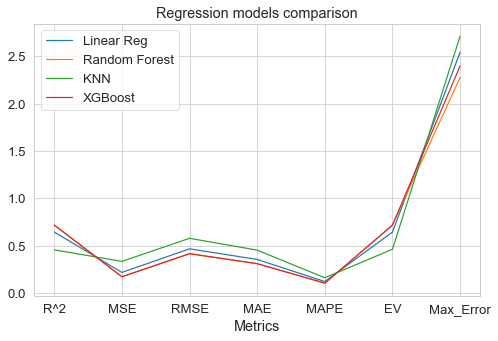

In [83]:
dff.plot(x='Metrics', figsize=(8,5), title='Regression models comparison')

From the graph above we can see that the results from all models are quite similar and behave similary. After deeper analysis we can conclude that Knn regressor did the worst job because of higher then others errors, low R^2, and the highest Max_Error. On the other side XGBoost and Random Forest regressors got best results. There is little difference between their results except Max_Error, where Random Forest showed slightly better result then XGBoost. 

In next task we will return the omitted features and rerun the models again. In the end we will compare between the results.

In [84]:
train2_updated = train.copy()
test2_updated = test.copy()


train2_updated['label'] = new_label_in_train['label']
test2_updated ['label'] = new_label_in_test ['label']

train2_updated = train2_updated.drop(columns='satisfaction', axis=1)
test2_updated = test2_updated.drop(columns='satisfaction', axis=1)

In [85]:
x2_training = train2_updated.drop(columns=["label"])
y2_training = train2_updated['label']
x2_testing = test2_updated.drop(columns=["label"])
y2_testing = test2_updated['label']

In [86]:
lin_regression_metrics_v2 ={}

lin_regression = linear_model.LinearRegression()

lin_regression.fit(x2_training, y2_training)
lin_y_pred_v2 = lin_regression.predict(x2_testing)



calculate_metrics(lin_regression_metrics_v2,y2_testing,lin_y_pred_v2)

In [87]:
rand_forest_metrics_v2 ={}

param_grid = {
    'criterion':['mse'],
    'n_estimators': [150, 180, 200, 220],  # The number of trees in the forest.
    'max_depth': [None, 40, 60, 80],  # The maximum depth of the tree.
   'max_features': ['sqrt',4,5],  # The number of features to consider when looking for the best split
    'min_samples_split': [None, 3, 4],  # The minimum number of samples required to split an internal node
    'bootstrap': [True]  # Whether bootstrap samples are used when building trees.
}

# Create a grid search object
gsRF = GridSearchCV(RandomForestRegressor(), param_grid, verbose =2, n_jobs=-1, cv=3)

# Fit
gsRF.fit(x2_training, y2_training)
new_best_model = gsRF.best_estimator_

RF_ypred_v2 = new_best_model.predict(x2_testing)

calculate_metrics(rand_forest_metrics_v2,y2_testing,RF_ypred_v2)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [88]:
KNN_metrics_v2 ={}

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}

gsKnn = GridSearchCV(KNeighborsRegressor(), grid_params, verbose =1, n_jobs=-1, cv=3)

# Fit
gsKnn.fit(x2_training, y2_training)
best_model = gsKnn.best_estimator_

Knn_ypred_v2 = best_model.predict(x2_testing)


calculate_metrics(KNN_metrics_v2,y2_testing,Knn_ypred_v2)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [89]:
xgb_metrics_v2 ={}
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_reg = GridSearchCV(XGBRegressor(), params, verbose =2, n_jobs=-1, cv=3)

# Fit
xgb_reg.fit(x2_training, y2_training)
best = xgb_reg.best_estimator_

xgb_ypred_v2 = best.predict(x2_testing)


calculate_metrics(xgb_metrics_v2,y2_testing,xgb_ypred_v2)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


Gathering all data together:

In [90]:
dff_v2 = pd.DataFrame(list(lin_regression_metrics_v2.items()))
dff_v2.rename(columns={0:'Metrics',1:'Linear Reg'}, inplace=True)
df1 = pd.DataFrame(list(rand_forest_metrics_v2.items()))
df2 = pd.DataFrame(list(KNN_metrics_v2.items()))
df3 = pd.DataFrame(list(xgb_metrics_v2.items()))

dff_v2['Random Forest']=df1[1]
dff_v2['KNN']=df2[1]
dff_v2['XGBoost']=df3[1]

In [91]:
dff_v2

Metrics    Linear Reg  Random Forest       KNN   XGBoost
0        R^2  1.000000e+00       0.996037  0.623784  0.999647
1        MSE  4.223702e-29       0.002455  0.233094  0.000219
2       RMSE  6.499001e-15       0.049551  0.482798  0.014793
3        MAE  4.629796e-15       0.027484  0.372979  0.011495
4       MAPE  1.498827e-15       0.010198  0.134805  0.004051
5         EV  1.000000e+00       0.996038  0.632380  0.999647
6  Max_Error  1.216804e-13       0.626852  2.333084  0.065048

<AxesSubplot:title={'center':'With important features'}, xlabel='Metrics'>

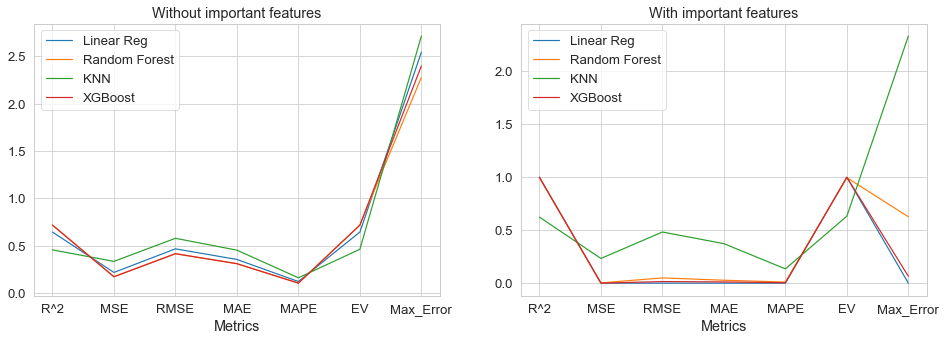

In [92]:
fig, axs = plt.subplots(1,2)
dff.plot(ax=axs[0], x='Metrics', figsize=(16,5), title='Without important features')
dff_v2.plot(ax=axs[1], x='Metrics', figsize=(16,5), title='With important features')



From the graphs comparison above we can see how "label features" influence the results. Knn model is the only one  that improved slightly, while the other models changed significantly. Linear regression got the highest R^2 and EV scores (1.0) and the lowest errors which can be neglected. Random forest and XGBoost also showed good results - R^2 and EV scores are almost 1.0 and very low errors rate. Random forest stands out with hight Max_error number in comparison to XGBoost.

In [93]:
LR_importance = lin_regression.coef_
columns_list = x2_training.columns

LR_feature_import = {}
for i,v in enumerate(LR_importance):
    LR_feature_import[columns_list[i]] = round(v, 3)

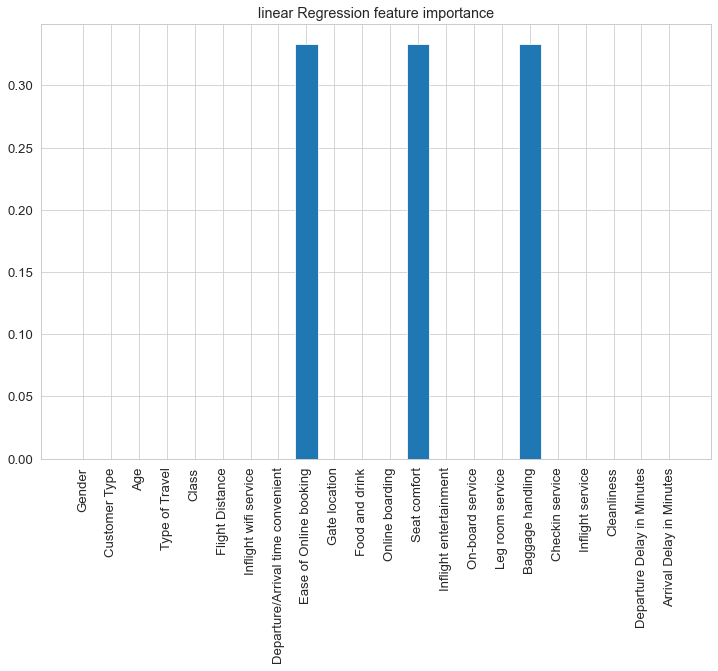

In [94]:
keys = LR_feature_import.keys()
values = LR_feature_import.values()

plt.figure(figsize=(12,8))
plt.bar(keys, values)
plt.xticks(rotation= 90)
plt.title('linear Regression feature importance')
plt.show()

In [95]:
RFimportance = new_best_model.feature_importances_
RF_feature_import = {}
for i,v in enumerate(RFimportance):
    RF_feature_import[columns_list[i]] = round(v, 3)

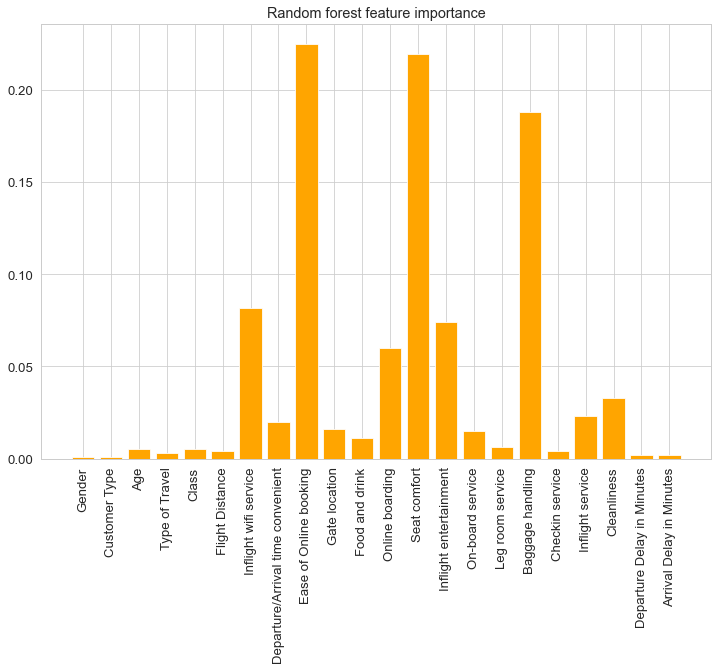

In [96]:
plt.figure(figsize=(12,8))
plt.bar(RF_feature_import.keys(), RF_feature_import.values(),color='orange')
plt.xticks(rotation= 90)
plt.title('Random forest feature importance')
plt.show()

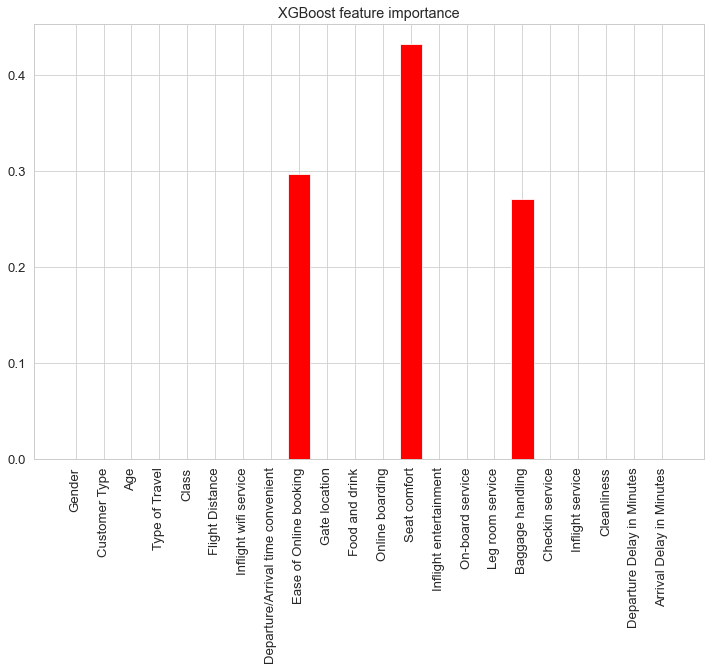

In [97]:
XGB_importance = best.feature_importances_

XGB_feature_import = {}
for i,v in enumerate(XGB_importance):
    XGB_feature_import[columns_list[i]] = round(v, 3)

plt.figure(figsize=(12,8))
plt.bar(XGB_feature_import.keys(), XGB_feature_import.values(),color='red')
plt.xticks(rotation= 90)
plt.title('XGBoost feature importance')
plt.show()

We conclude that there is an impact on algorithms when data includes columns from which a label was calculated. Best results was shown by linear regression. In our opinion this happened because the label was calculated by linear equation (mean) and hence linear regressor succeded to predict corectly. In addition to our conclusion, linear regressor was the fastest model (less than a second) and in this case of data this model is highly recommended.

<div id="7">
    <h2>Summary:</h2>
</div>


### 7. Conclusion from work:
We learned alot from this excrise, we learned about xgboost algoritm and found it very helpul in regression and classification problems (we will elaborate on the model later). 
We saw that using clustering models can improve our model's preformances - running time wise, without effecting the accuracy results. when selecting feature that are not important for the classification, and modyfiny them (removing, combaibig them together), its a good practice to do before classifying tasks.

We got to learn about model improvment using other model's predictions (section 5).

Our prime problem ws with the data size. It was large and required alot of time to train our models. 
We accualy tried neural nets model for section 5 and gave it up for its long running time.
Also, we found several solutions to deal with the long running time problem. 
For example, in the SVM model, we used parameters that help in this section- c<1 & using only the linear kernel, which according to the internet, is the fastest one. 
Moreover, the stantartization of the data was key for not only redue the running time of our models (espacially in models based on distance calculation such as knn and svm), it was also crutial for the accuracy and visualization. 
We sampled from our data, to represent some of the point after dimantion reduction in our PCA visualization.




In [98]:
models = ['Random Forest','Adaboost','SVM','XGBoost','Ensemle model-XGBoost']
accuracy = ['0.9600','0.9255','0.9524','0.9391','0.9615']
finalResults = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
print ('Final Results - Classification models:')
finalResults

Final Results - Classification models:


Model Accuracy
0          Random Forest   0.9600
1               Adaboost   0.9255
2                    SVM   0.9524
3                XGBoost   0.9391
4  Ensemle model-XGBoost   0.9615

## Final results classification models:
We can see the accurecies are quite good.

The beat accuracy is for our gradient boost after preforming out of fold geature importance inhancing.
We used the feature importance mean from all other classifiers results as a new feature for the xgboost algoritm.
As we see in the results, the algorithm's preformance was indeed improved from 93% to 96% accuracy.

Other models where good as well, especially the random forest model.
But the best is the Xgboost after preforming the procedure

## Explanation for classification results:

In all models we tested them after feature improvments in section 4. 

### Random Forest :
We used random forest and got good accuracy. We had a good results becuasee the problem we dealed with need classification model and it's about a determination that can be solved perfectly with a trees model and random forest can pick the best tree that gives the best results.
Random forest is an algorithms that have built-in feature selection methods.
We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

### Adaboost :
We used adaboost which is also a forest based model. We got hood results because problem like costumers satisfaction (binary desicion ) can be solved perfectly using tree models .

### SVM :
this algorithm try to find the best linear vector between the clusters to define them clearly so in our case we have two clusters 1 and 0 . so when we want to predict about another object ( new one) we can see the devision between the clusters and where it belongs and the vectors always get fixed when new object added according to its place.

Choosing a kernel function is not an easy task. We chose to use only linear kernel for it's the only kernel allowing feature importance calculation. Another reason is SVM takes a lot of time for training with large datasets, using linear kernel as many Google site's suggested, is the fastest kernel. 

### XGBoost :
XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.
XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data. and that's why we got high results
this algorithem is one of the best algorithems that are now in use, it can do optimizaton for the feature by it self (accordin to kaggle, youtube and medium)

### XGBoost - Meta model:
We used the out-of-fold predictions to create and  the meta-model.
WE trained each base model on the entire training dataset, then make a prediction for each example in the training dataset and use the predictions as input to the meta-model. The problem is the predictions will be optimistic because the samples were used in the training of each base model. This optimistic bias means that the predictions will be better than normal, and the meta-model will likely not learn what is required to combine and correct the predictions from the base models.

By using out-of-fold predictions from the base model to train the meta-model, the meta-model can see and harness the expected behavior of each base model when operating on unseen data, as will be the case when the ensemble is used in practice to make predictions on new data.

Finally, each of the base models are trained on the entire training dataset and these final models and the meta-model can be used to make predictions on new data. The performance of this ensemble can be evaluated on a separate holdout test dataset not used during training.We used the training data for the base model predictions using kfold method. And the testing data- the "unseen data" ad testing for our Met model. 

### Regression models without "label features" comparison:


|  Model | $R^2$ | MSE |RMSE |MAE |MAPE |EV |Max_Error | .
| --- | --- | --- | --- |--- |--- |--- |--- |--- |
| Linear Regression | 64% | 0.21 |0.468|0.356|0.123|64%|2.54|
| Random Forest | 71.9% | 0.174 |0.417|0.312|0.107|71.9%|2.27|
| KNN  | 45.7% | 0.336 |0.58|0.454|0.163|46.4%|2.71|
| XGBoost  | 71.7% | 0.175 |0.418|0.312|0.106|71.7%|2.43|


### Description of regression models:
#### Linear Regression
    Very fast model, executes within a second. In r-squared estimation it got 64% which means that 36% of the data
    can not be accounted for by this model. The MSE, RMSE, MAE, and MAPE are worse than other models (except KNN).
    In addition maximum error is slightly higher than others but is not significant.
    There  were no problems in operating the model, it is worked fast and easy to execute.

#### Random Forest
    This model in r-squared estimation got almost 72%, which is much better than previous model.Estimation of 4 
    errors are lower also which means that random forest coped better with the prediction of calculated label.
    The main problem with this model at this stage was long time running while fitting it. In order to cut the
    time we lowered the number of Cross Validation from 5 to 3, and in other parameters we inputed 3,4 options.

#### KNN
    This model showed itself very bad. Its' r-square estimator showed 45.7% which means that more than half of the
    data can not be accounted for by this model. Error rates are the highest out of all compared models which
    reflects the low r-square. We didn't face any specific problems with running this algorithm.

#### XGBoost
    This model showed very good results which are similar to random forest. All errors rate are also similar to
    random forest with very small difference. In order to cope with time running of the model we reduced number
    of variables in grid search and also lowered number of cross validation.

### Regression models with "label features" comparison:

|  Model | $R^2$ | MSE |RMSE |MAE |MAPE |EV |Max_Error |.
| --- | --- | --- | --- |--- |--- |--- |--- |--- |
| Linear Regression | 100% | 0 |0|0|0|100%|0|
| Random Forest | 99.6% | 0.0025 |0.05|0.027|0.0101|99.6%|0.733|
| KNN  | 62.3% | 0.233 |0.482|0.372|0.134|63.2%|2.33|
| XGBoost  | 99.9% | 0.0002 |0.014|0.011|0.004|99.9%|0.065|

### Description of regression models:
#### Linear Regression
    We can see perfect results. 100% r-squared and 0 errors rates. We conclude that because of the existance
    of 3 columns which from them was calculated label, the calculation result was recieved after linear
    equasiotn (mean), and this fis perfect linear regression model.
    
#### Random Forest
    If there was a competition then this model would get a 3rd place out of 4 models. But actually its results
    are very good and slightly different from the second place algorithm.
    
#### KNN
    Although this model got better results in all estimators than in previous run, still this results are
    far from good. r-square is still low and errors rates are high
    
#### XGBoost    
    This model showed almost perfect results. R-square is almost 100% and errors are very slow.In cases of unknown
    data (linear or not) this model is recommended because of his high results.

<center> <h1> Thank you for reading </h1> <center>